In [1]:
from lblcrn.bulk_crn import *
from lblcrn.crn_sym import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
sm = SpeciesManager()

y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

multipliers = [0.1, 0.5, 1, 5, 10]
highp_hight = XPSInitializationData(
                'High P, High T',
                [0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.116930, 0.152889, 3.270343, 0.329519, 1.111032],
                '../data/ag_100e-3_300.txt'
            )
init_data = [highp_hight]

In [3]:
def rsys_generator(scaled):
    rsys = RxnSystem(
        Rxn(x4 + y1, x54, scaled[0]), # 0
        Rxn(x3 + y1, x53, scaled[1]), # 1
        Rxn(x54, x3 + x3, scaled[2]), # 2
        Rxn(x3 + x3, x54, scaled[3]), # 3
        Rxn(x53, x2 + x3, scaled[4]), # 4
        Rxn(x54, x2 + x4, scaled[5]), # 5
        Rxn(x2, y1, scaled[6]), # 6
        Rxn(y1, x2, scaled[7]), # 7
        Rxn(x53, y1 + x3, scaled[8]), # 8
        Rxn(x54, x4 + y1, scaled[9]), # 9
        Rxn(x53 + y1, x6, scaled[10]), # 10
        Rxn(x6, x53 + y1, scaled[11]), # 11
        Rxn(x4 + x4, x7, scaled[12]), # 12
        Rxn(x7, x4 + x4, scaled[13]), # 13
        Conc(y1, 1.0),
        Conc(x4, 0.25),
        sm
    )
    return rsys

In [5]:
runner = XPSSystemRunner(rsys_generator, 10000, init_data, multipliers)

In [6]:
runner.simulate(0)

Solved for (0, 0)
[0.023619100000000004, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 1)
[0.1180955, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 3)
[1.180955, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 4)
[2.36191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (1, 0)
[0.236191, 0.0169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (1, 1)
[0.236191

Solved for (10, 1)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.0764445, 3.270343, 0.329519, 1.111032]


Solved for (10, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (10, 3)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.764445, 3.270343, 0.329519, 1.111032]


Solved for (10, 4)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 1.52889, 3.270343, 0.329519, 1.111032]


Solved for (11, 0)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 0.3270343, 0.329519, 1.111032]


Solved for (11, 1)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 1.6351715, 0.329519, 1.111032]


Solved for (11, 2)
[0.236191, 0.

In [11]:
import pickle
with open('../ag_v2.pkl', 'wb') as f:
    pickle.dump(runner, f)

PicklingError: Can't pickle <function rsys_generator at 0x10bddea60>: it's not the same object as __main__.rsys_generator

In [8]:
runner = pickle.load(open('../data/ag_v2.pkl', 'rb'))

In [9]:
sys = runner.system()

scaling factor: 216.96228358774303 	max index: -1


In [10]:
sys.ignore = [y1]

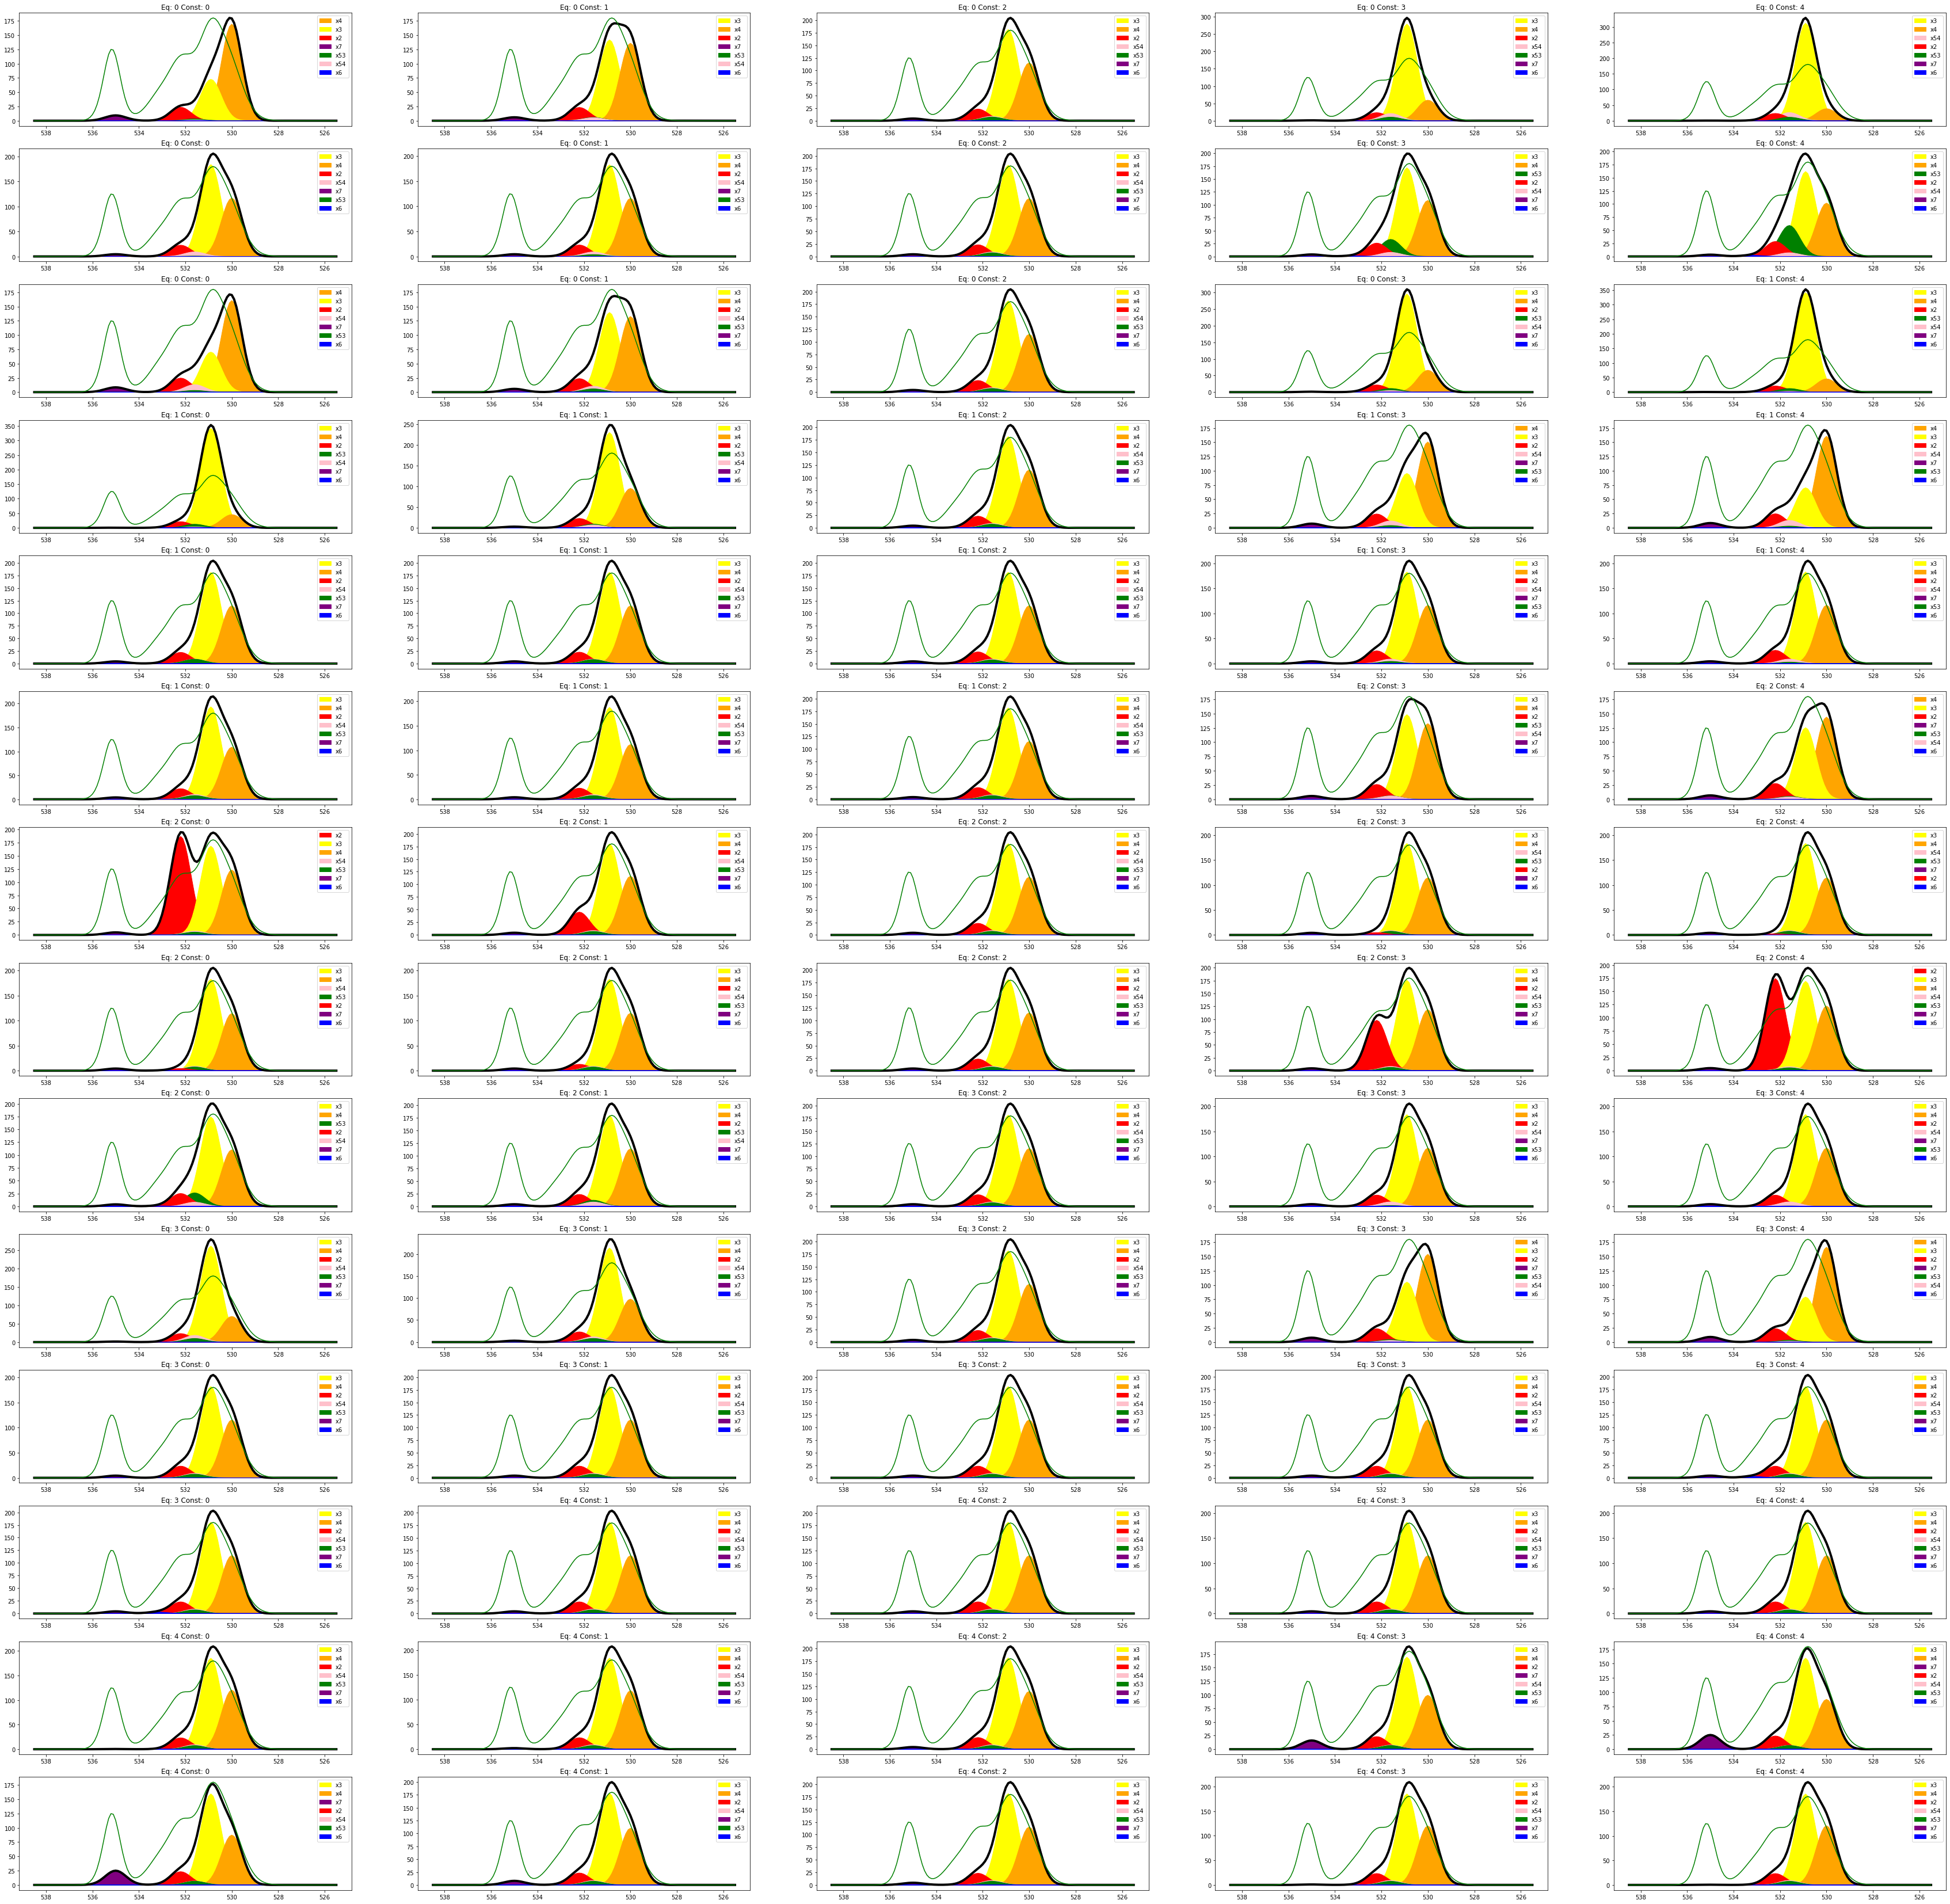

In [11]:
sys.plot(0, rows=14, cols=5)